In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import glob, os
import re 

import PIL
from PIL import Image

In [3]:
# Use Pillow library to convert an input jpeg to a 8 bit grey scale image array for processing.
def jpeg_to_8_bit_greyscale(path, maxsize):
    img = Image.open(path).convert('L') #convert image to 8 bit greyscale
    # Make aspect ratio as 1:1, by applying image crop
    # Please note, croping works for this data set, but in general one
    # needs to locate the subject and then crop or scale accordingly.
    WIDTH, HEIGHT = img.size
    if WIDTH != HEIGHT:
        m_min_d = min(WIDTH, HEIGHT)
        img = img.crop((0, 0, m_min_d, m_min_d))
     # Scale the image to the requested maxsize by Anti-alias sampling.
    img.thumbnail(maxsize, PIL.Image.ANTIALIAS)
    return np.asarray(img)

In [4]:
# LOAD THE DATA SETS FROM IMAGES INTO NUMPY ARRAYS
def load_image_dataset(path_dir, maxsize):
    images = []
    labels = []
    os.chdir(path_dir)
    for file in glob.glob("*.jpg"):
        img = jpeg_to_8_bit_greyscale(file, maxsize)
        if re.match('chihuahua.*', file):
            images.append(img)
            labels.append(0)
        elif re.match('muffin.*', file):
            images.append(img)
            labels.append(1)
    return (np.asarray(images), np.asarray(labels))

In [5]:
maxsize = 100, 100

In [9]:
# load the data
(train_images, train_labels) = load_image_dataset('/Users/macbook/Documents/chihuahua-muffin/image-recognition-tensorflow/chihuahua-muffin', maxsize)
(test_images, test_labels) = load_image_dataset('/Users/macbook/Documents/chihuahua-muffin/image-recognition-tensorflow/chihuahua-muffin/test_set', maxsize)

/var/folders/2y/tbg6y_k178s08x5pqx2zjg_00000gn/T/ipykernel_92389/2692765754.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img.thumbnail(maxsize, PIL.Image.ANTIALIAS)


In [10]:
# defining class name
class_names = ['chihuahua', 'muffin']

In [11]:
# explore data
train_images.shape

(26, 100, 100)

In [12]:
print(train_labels)

[0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0]


In [13]:
test_images.shape

(14, 100, 100)

In [19]:
#visualizing the dataset
def display_images(images, labels):
    plt.figure(figsize=(10, 10))
    grid_size = min(25, len(images))
    for i in range(grid_size):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])

<function matplotlib.pyplot.show(close=None, block=None)>

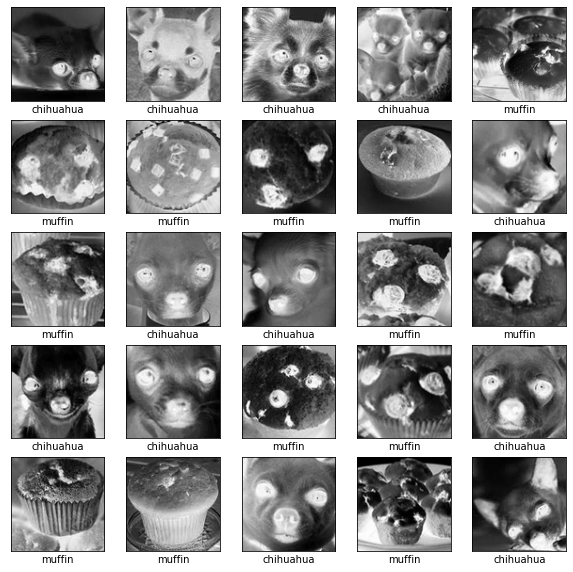

In [20]:
# execute the function to show the data
display_images(train_images, train_labels)
plt.show